In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Load the CSV file
file_path = '/Users/dylan/Documents/Thesis-Folder/Thesis/Analysis/Ablation-Analysis.csv'
data = pd.read_csv(file_path)

new_columns = {
    'Paper': 'Paper',
    'Variables Studied': 'Variables',
    'Analysis Notes': 'Analysis',
    'Categorisation:': 'Categorisation'
}

data = data.rename(columns=new_columns)


data.head(), data.columns

(                                               Paper                Author  \
 0  Language Models are Few-shot Multilingual Lear...   Winata et al., 2021   
 1  Few-shot Learning with Multilingual Language M...      Lin et al., 2022   
 2  Language Models are Multilingual Chain-of-Thou...      Shi et al., 2022   
 3  In-context Examples Selection for Machine Tran...  Agrawal et al., 2022   
 4  Multilingual LLMs are Better Cross-lingual In-...   Tanwar et al., 2023   
 
                                            Variables  \
 0  DS - By using both positive and negative sampl...   
 1                                             DS, DO   
 2  DS: The paper tests different few-shot exempla...   
 3  DS: The paper explores how the choice of in-co...   
 4  DS: The paper explores how different in-contex...   
 
                                             Analysis      Categorisation  
 0  Study tries to separate the effects of demonst...  Moderate Isolation  
 1  Paper doesn't clearly se

In [7]:
# Extract the relevant column for easier access and analysis
variables_studied_column = data[
    "Variables"]

# Create a summary dictionary to hold counts of studies per variable
variables_summary = {
    "Demonstration Selection": 0,
    "Demonstration Ordering": 0,
    "Instruction Formatting": 0,
    "Reasoning Step": 0
}
# Analyze each entry to count occurrences of variables studied
for entry in variables_studied_column.dropna():
    if "DS" in entry:
        variables_summary["Demonstration Selection"] += 1
    if "DO" in entry:
        variables_summary["Demonstration Ordering"] += 1
    if "IF" in entry:
        variables_summary["Instruction Formatting"] += 1
    if "RS" in entry:
        variables_summary["Reasoning Step"] += 1

# Prepare data for plotting
variables = list(variables_summary.keys())
counts = list(variables_summary.values())

# Create bar chart
plt.figure(figsize=(10, 6))  # Adjusted figure size for better fit
plt.bar(variables, counts, color=['blue', 'green', 'red', 'purple'])  # Adjust colors as needed
plt.xlabel('Variable Type')
plt.ylabel('Count of Studies')
plt.xticks(rotation=45)  # Ensures that the labels do not overlap
plt.show()

KeyError: 'Variables'

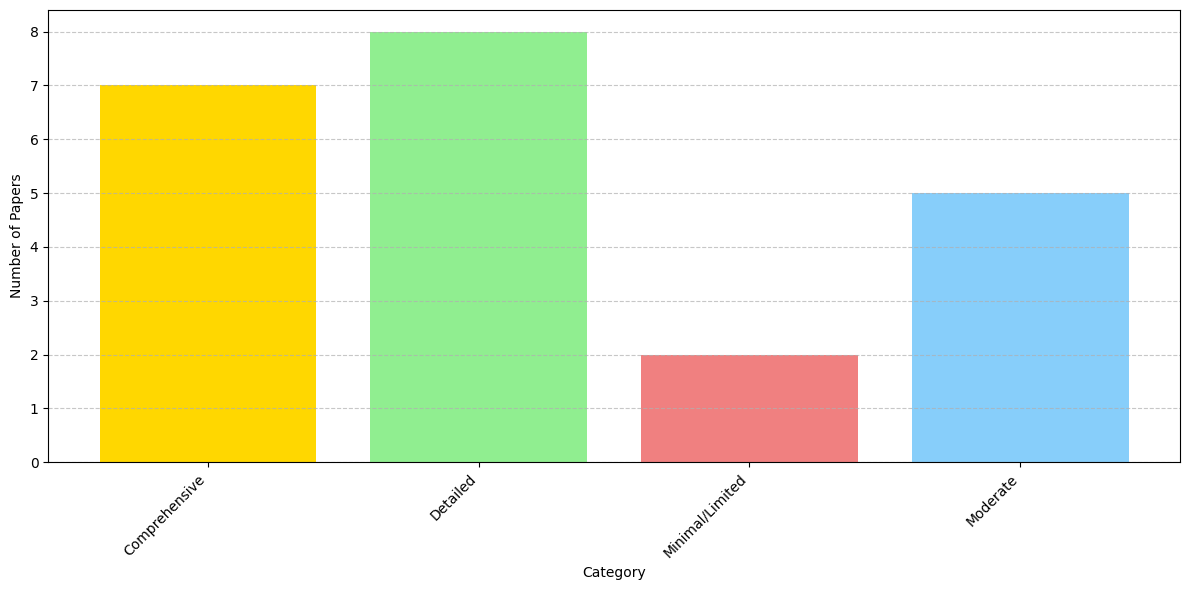

In [5]:
data = {
    "Paper Number": list(range(1, 23)),
    "Category": [5, 5, 4, 1, 4, 3, 3, 4, 5, 4, 3, 5, 4, 3, 4, 5, 4, 5, 5, 4, 2, 3]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Merge categories 1 and 2 into a single category "Minimal/Limited Mention"
df['Category'] = df['Category'].replace({1: "Minimal/Limited Mention", 2: "Minimal/Limited Mention"})
df['Category'] = df['Category'].replace({
    3: "Moderate Discussion",
    4: "Detailed Discussion",
    5: "Comprehensive Analysis"
})

# Define shorter category labels
short_category_labels = {
    "Minimal/Limited Mention": "Minimal/Limited",
    "Moderate Discussion": "Moderate",
    "Detailed Discussion": "Detailed",
    "Comprehensive Analysis": "Comprehensive"
}

df['Category'] = df['Category'].map(short_category_labels)
merged_category_counts = df['Category'].value_counts().sort_index()


colors = {
    "Minimal/Limited": "lightcoral",
    "Moderate": "lightskyblue",
    "Detailed": "lightgreen",
    "Comprehensive": "gold"
}

plt.figure(figsize=(12, 6))
plt.bar(merged_category_counts.index, merged_category_counts.values, color=[colors[label] for label in merged_category_counts.index])

plt.xlabel('Category')
plt.ylabel('Number of Papers')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [8]:

# Data from the dictionary
data = {
    "Paper": range(1, 23),
    "DS": [True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True],
    "DO": [True, False, False, True, True, False, True, False, False, False, False, True, False, False, True, False, False, False, False, True, False, False],
    "IF": [False, False, True, False, True, False, True, False, True, True, False, True, True, True, True, False, True, True, True, True, True, True],
    "RF": [False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple']
plt.bar(variables, num_papers, color=colors)
plt.xlabel('Variables')
plt.ylabel('Number of Papers')
plt.ylim(0, 22)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(range(0, 23, 1))  # Set y-axis to integer values only
plt.show()

NameError: name 'variables' is not defined

<Figure size 1000x600 with 0 Axes>